# Sangkak AI Challenge: NER tasks
-------------------------------------------------------

- **Author**: Elvis MBONING (NTeALan Research and Development Team)
- **Session**: février 2023

----------------------------------------------------------------

In this notebook, we try to evaluate models build with CRF on test data. Depending of the type of model, we will give specific evaluation.

We want to evaluate these points:

 - the F1 score of each label in the model
 - the impact of augmentation on the model
 - the impact of selected features on the model
 - the capacity of model to give good tag in new dataset
 - comparaison between the final best model with results of Masahkane


# 1. Data preparation


### 1.1. Loading test data

In [ ]:
# Install python packages dependencies (if not already installed)
!pip3 install pandas python_crfsuite summarytools sklearn_crfsuite unidecode
!pip3 install iteration_utilities matplotlib

In [2]:
import pandas as pd
import pycrfsuite
from pathlib import Path 

from auglib import read_format_iob_data

In [3]:
# Get path of test data 
language = 'bbj'
bbj_ner_path   = Path(f'../data_source/masakhane-ner/MasakhaNER2.0/data/{language}')
test_data_path = bbj_ner_path / 'test.txt'


In [ ]:
language = 'multi-all'
ner_path = Path(f'../data_source/masakhane-ner/MasakhaNER2.0/data/')

test_data_path = list(ner_path.glob('*/test.txt'))


# read and extract iob data
extracted_test_data, pd_test_data, only_test_ner_data, o_test_ner_data = [],[],[],[]
total = 0
for tr in test_data_path:
    extracted_test, pd_test, only_test_ner, o_test_ner = read_format_iob_data(tr)
    extracted_test_data = extracted_test_data + extracted_test
    pd_test_data = pd_test if type(pd_test_data) == list else pd.concat([pd_test_data, pd_test], ignore_index=True)
    for x in only_test_ner: only_test_ner_data.append(x)
    for x in o_test_ner: o_test_ner_data.append(x)
    total += len(only_test_ner)
    

# some stats 
print(f"Total of sentences: {total}")
print("Total number of sentences in the train dataset: {:,}".format(pd_test_data["sentence_id"].nunique()))
print("Total words in the train dataset: {:,}".format(pd_test_data.shape[0]))

only_test_ner_data 

In [8]:
language = 'twi'
twi_ner_path = Path(f'../data_source/masakhane-ner/MasakhaNER2.0/data/twi')
bbj_ner_path = Path(f'../data_source/masakhane-ner/MasakhaNER2.0/data/bbj')
bam_ner_path = Path(f'../data_source/masakhane-ner/MasakhaNER2.0/data/bam')
ewe_ner_path = Path(f'../data_source/masakhane-ner/MasakhaNER2.0/data/ewe')
wol_ner_path = Path(f'../data_source/masakhane-ner/MasakhaNER2.0/data/wol')
zul_ner_path = Path(f'../data_source/masakhane-ner/MasakhaNER2.0/data/zul')
yor_ner_path = Path(f'../data_source/masakhane-ner/MasakhaNER2.0/data/yor')

bbj_test_data_path   = bbj_ner_path / 'test.txt'
twi_test_data_path   = twi_ner_path / 'test.txt'
bam_test_data_path   = bam_ner_path / 'test.txt'
ewe_test_data_path   = ewe_ner_path / 'test.txt'
wol_test_data_path   = wol_ner_path / 'test.txt'
zul_test_data_path   = zul_ner_path / 'test.txt'
yor_test_data_path   = yor_ner_path / 'test.txt'

# read and extract iob data
test_data = [bbj_test_data_path, twi_test_data_path, zul_test_data_path, yor_test_data_path, wol_test_data_path, 
             ewe_test_data_path, bam_test_data_path]
extracted_test_data, pd_test_data, only_test_ner_data, o_test_ner_data = [],[],[],[]
total = 0
for tr in test_data:
    extracted_test, pd_test, only_test_ner, o_test_ner = read_format_iob_data(tr)
    extracted_test_data = extracted_test_data + extracted_test
    pd_test_data = pd_test if type(pd_test_data) == list else pd.concat([pd_test_data, pd_test], ignore_index=True)
    for x in only_test_ner: only_test_ner_data.append(x)
    for x in o_test_ner: o_test_ner_data.append(x)
    total += len(only_test_ner)
    print(len(only_test_ner), len(pd_test.index), len(extracted_test))
    

# some stats 
print(f"Total of sentences: {total}")
print("Total number of sentences in the test dataset: {:,}".format(pd_test_data["sentence_id"].nunique()))
print("Total words in the test dataset: {:,}".format(pd_test_data.shape[0]))

only_test_ner_data 


619 15924 966
390 30207 1211
998 27756 1670
1003 47617 1964
723 39439 1312
913 21443 1001
681 33298 1274
Total of sentences: 5327
Total number of sentences in the test dataset: 1,964
Total words in the test dataset: 215,684


[[('Brɛ́ndá', 'B-PER'),
  ('Biya', 'I-PER'),
  ('mú', 'O'),
  ('yə', 'O'),
  ('mjwǐ', 'O'),
  ('Fo', 'O'),
  ('gúŋ', 'O'),
  ('Ləpʉə', 'O'),
  ('Kaməlûm', 'B-LOC'),
  ('.', 'O'),
  ('.', 'O')],
 [('Taʼ', 'B-DATE'),
  ('gǔʼ', 'I-DATE'),
  ('nə̂', 'O'),
  ('twɔ̌k', 'O'),
  ('e', 'O'),
  ('yáp', 'O'),
  ('níŋ', 'O'),
  ('thə̂', 'O'),
  ('é', 'O'),
  ('nə́', 'O'),
  ('nə́', 'O'),
  ('cə̂ŋywə́', 'O'),
  ('nə́ŋ', 'O'),
  ('gə́', 'O'),
  ('mkaʼnyə', 'O'),
  ('sə́', 'O'),
  ('nə́', 'O'),
  ('tsə́', 'O'),
  ('tsyə', 'O'),
  ('e', 'O'),
  ('gɔ', 'O'),
  ('faʼ', 'O'),
  ('áá', 'O'),
  ('.', 'O'),
  ('.', 'O')],
 [('Cwəlɔ̌', 'B-DATE'),
  (',', 'O'),
  ('ě', 'O'),
  ('wə́', 'O'),
  ('gɔ́m', 'O'),
  ('gaə́', 'O'),
  ('daʼdaʼ', 'B-DATE'),
  ('é', 'O'),
  ('cwɔ́ʼ', 'O'),
  ('otɛ̂l', 'O'),
  ('e', 'O'),
  ('.', 'O'),
  ('.', 'O')],
 [('Brɛ́ndá', 'B-PER'),
  ('Biya', 'I-PER'),
  ('ka', 'O'),
  ('ŋkúŋ', 'O'),
  ('nə́', 'O'),
  ('ghɔm', 'O'),
  ('míŋ', 'O'),
  ('cwəlɔ̌', 'B-DATE'),
  ('.',

In [4]:
# Reading and loading test data

extracted_test_data, pd_test_data, only_test_ner_data, o_test_ner_data = read_format_iob_data(test_data_path)

print("Total number of sentences in the test dataset: {:,}".format(pd_test_data["sentence_id"].nunique()))
print("Total words in the test dataset: {:,}".format(pd_test_data.shape[0]))


Total number of sentences in the test dataset: 966
Total words in the test dataset: 15,924


### 1.2. Augmentation of test data 

The aims here is to validate that the augmentation on test data don't biaise the evaluation with no augmentation. 

In [6]:
# load augmentation library
from auglib import augment_ner_iob_data, list_to_pd_format

In [7]:
# augment testing data 
augmented_test_ner_data = augment_ner_iob_data(only_test_ner_data)

print(f'lenght Test data: {len(only_test_ner_data)} \n lenght Augmented data: {len(augmented_test_ner_data)}')

lenght Test data: 620 
 lenght Augmented data: 194423


In [8]:
# Transform augmented testing data to dataframe
pd_augment_ner_iob_data = list_to_pd_format(augmented_test_ner_data)
pd_augment_ner_iob_data

sentence_id    word iob_tag
0                  1     plã   B-ORG
1                  1    OBAR   I-ORG
2                  1   raabã       O
3                  1     yaa       O
4                  1     sẽn       O
...              ...     ...     ...
6059369       418526     sẽn       O
6059370       418526      kõ       O
6059371       418526  vẽenem       O
6059372       418526       .       O
6059373       418527       .       O

[6059374 rows x 3 columns]

<AxesSubplot: >

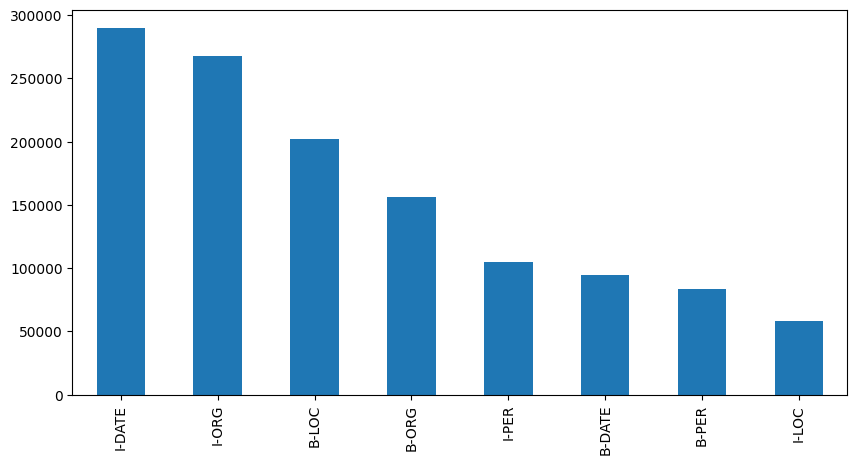

In [8]:
pd_augment_ner_iob_data[pd_augment_ner_iob_data.iob_tag != 'O']["iob_tag"]\
.value_counts().plot(kind="bar", figsize=(10,5))

### 1.3. Final visualization of test data 

In [9]:
# quantification des tags/phrases dans le corpus de test 
# credit: https://github.com/6chaoran/jupyter-summarytools
from summarytools import dfSummary, tabset

tabset({
    "augmented_test_data": dfSummary(pd_augment_ner_iob_data).render(),
    "test_data": dfSummary(pd_test_data).render()
})


/tmp/ipykernel_17642/738003656.py:6: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  "augmented_test_data": dfSummary(pd_augment_ner_iob_data).render(),
/tmp/ipykernel_17642/738003656.py:7: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  "test_data": dfSummary(pd_test_data).render()


### 1.4. Featurization of test data 


In [9]:
# Build features from dataset 
from features import sent2features, sent2labels

# print(len(pd_augment_ner_iob_data), len(pd_test_data))
# extracted_test_data | augmented_test_ner_data

# features test data
test_sents = [[word for word in sentence] for sentence in extracted_test_data]
Xtest = [sent2features(s) for s in test_sents]
ytest = [sent2labels(s) for s in test_sents]

# features test data with augmented sentences
test_sents_aug = [[word for word in sentence] for sentence in augmented_test_ner_data]
XtestAug = [sent2features(s) for s in test_sents_aug]
ytestAug = [sent2labels(s) for s in test_sents_aug]

print(f"Lenght X of test data: {len(Xtest)} | Y data: {len(ytest)}")
print(f"Lenght X aug of test data: {len(XtestAug)} | Y aug data: {len(ytestAug)}")


Lenght X of test data: 1294 | Y data: 1294
Lenght X aug of test data: 194423 | Y aug data: 194423


# 2. Evaluations without augmentation

In [10]:
import joblib
from sklearn_crfsuite import metrics, CRF
from collections import Counter


### 2.1. Load CRF models

In [11]:
# get model file from local path
models_no_aug_path = Path('./models/no_aug')
model_file = models_no_aug_path/"crf_sangkak-02-2023_2023-02-26_15:44:52.531372.model"
joblib_model_file_2 = models_no_aug_path/"crf_sangkak-twi_2023-02-28_00:15:23.342249.object"
joblib_model_file = models_no_aug_path/"crf_2023-02-26_15:44:52.531372.object"

# get model file from local path
models_multi_path = Path('./models/multi')
joblib_model_file = models_multi_path/"crf_sangkak-multi_2023-03-04_02:05:24.629542.object"



In [12]:
# load model with crf
model_data = joblib.load(joblib_model_file) 
crf, params = model_data['crf'], model_data['params'] 

### 2.2. Evaluate on single CRF model

In [13]:

def evaluate_crf_model(crf, Xtest, ytest):
    # get model classes
    labels = list(crf.classes_)
    labels.remove('O')

    sorted_labels = sorted(labels, key=lambda name: (name[1:], name[0]))
    #print(sorted_labels)

    # obtaining metrics such as accuracy, etc. on the test set
    ypred = crf.predict(Xtest)
    print('- F1 score on the test set = {}'.format(
            metrics.flat_f1_score(ytest, ypred, average='weighted', 
                        labels=labels, zero_division=False)))

    print('- Accuracy on the test set = {}\n'.format(
        metrics.flat_accuracy_score(ytest, ypred)))

    print('Train set classification report: \n\n{}'.format(
                metrics.flat_classification_report(ytest, 
                ypred, labels=sorted_labels, digits=3, zero_division=False)))



In [14]:
# run evaluation of test data
evaluate_crf_model(crf, Xtest, ytest)

- F1 score on the test set = 0.9229063362366616
- Accuracy on the test set = 0.9894336158454035

Train set classification report: 

              precision    recall  f1-score   support

      B-DATE      0.960     0.859     0.907      1611
      I-DATE      0.976     0.938     0.957      2487
       B-LOC      0.924     0.949     0.936      3767
       I-LOC      0.948     0.890     0.918       847
       B-ORG      0.936     0.798     0.861      1882
       I-ORG      0.981     0.920     0.949      1510
       B-PER      0.979     0.770     0.862      3633
       I-PER      0.989     0.987     0.988      2929

   micro avg      0.961     0.891     0.925     18666
   macro avg      0.962     0.889     0.922     18666
weighted avg      0.962     0.891     0.923     18666



Multi-language model:
---------------------


- F1 score on the test set = 0.9229063362366616
- Accuracy on the test set = 0.9894336158454035

Train set classification report: 

              precision    recall  f1-score   support

      B-DATE      0.960     0.859     0.907      1611
      I-DATE      0.976     0.938     0.957      2487
       B-LOC      0.924     0.949     0.936      3767
       I-LOC      0.948     0.890     0.918       847
       B-ORG      0.936     0.798     0.861      1882
       I-ORG      0.981     0.920     0.949      1510
       B-PER      0.979     0.770     0.862      3633
       I-PER      0.989     0.987     0.988      2929

   micro avg      0.961     0.891     0.925     18666
   macro avg      0.962     0.889     0.922     18666
weighted avg      0.962     0.891     0.923     18666

-------------------------------------------------------

mos: crf_sangkak-mos_2023-02-28_00:02:17.420665.object 

- F1 score on the test set = 0.9080788199051728
- Accuracy on the test set = 0.9888597640891219

Train set classification report: 

              precision    recall  f1-score   support

      B-DATE      0.995     0.943     0.968       228
      I-DATE      0.994     0.967     0.980       659
       B-LOC      0.766     0.916     0.834       415
       I-LOC      0.851     0.797     0.824        79
       B-ORG      0.939     0.576     0.714       347
       I-ORG      0.986     0.917     0.950       460
       B-PER      0.979     0.898     0.937       206
       I-PER      0.992     0.968     0.980       251

   micro avg      0.937     0.887     0.911      2645
   macro avg      0.938     0.873     0.898      2645
weighted avg      0.944     0.887     0.908      2645


twi: crf_sangkak-twi_2023-02-28_00:13:32.826806.object

- F1 score on the test set = 0.9232282401071604
- Accuracy on the test set = 0.9944714801205019

Train set classification report: 

              precision    recall  f1-score   support

      B-DATE      0.962     0.752     0.844       101
      I-DATE      0.995     0.953     0.974       214
       B-LOC      0.840     0.940     0.887       218
       I-LOC      0.838     0.931     0.882        72
       B-ORG      0.987     0.772     0.866       193
       I-ORG      0.967     0.945     0.956       219
       B-PER      0.965     0.874     0.918       223
       I-PER      0.989     1.000     0.995       182

   micro avg      0.946     0.904     0.924      1422
   macro avg      0.943     0.896     0.915      1422
weighted avg      0.950     0.904     0.923      1422

### 2.3. Evaluate on all CRFs models

In [45]:
# get all trained CRF models 
crf_models_files = models_no_aug_path.glob('*.model')

params = {
    "algorithm": 'lbfgs',
    "c1": 0.0920512484757745,
    "c2": 0.0328771171605105, 
    "max_iterations":100,
    "verbose":True,
    "num_memories":10000,
    "epsilon": 1e-3,
    "linesearch": "MoreThuente",
    "max_linesearch":100000,
    "delta":1e-4,
    "all_possible_states":True,
    "all_possible_transitions":True, 
}

for model_file in crf_models_files:
    try:
        # load model with crf
        print("Work on: {}\n".format(model_file))
        params['model_filename'] = str(model_file)
        crf_ = CRF(**params)
        evaluate_crf_model(crf_, Xtest, ytest)

    except Exception as e: 
        print(f"Error on: {model_file} {str(e)}\n")
    

Work on: models/no_aug/crf_sangkak-02-2023_2023-02-16 21:26:46.256815.model

- F1 score on the test set = 0.7418788827766187
- Accuracy on the test set = 0.9507661391610148

Train set classification report: 

              precision    recall  f1-score   support

      B-DATE      0.847     0.678     0.753       180
      I-DATE      0.932     0.835     0.881       345
       B-LOC      0.588     0.746     0.657       256
       I-LOC      0.387     0.800     0.522        30
       B-ORG      0.744     0.442     0.555       217
       I-ORG      0.577     0.833     0.682        90
       B-PER      0.638     0.812     0.714       399
       I-PER      0.714     1.000     0.833       385

   micro avg      0.701     0.791     0.744      1902
   macro avg      0.678     0.768     0.700      1902
weighted avg      0.725     0.791     0.742      1902

Work on: models/no_aug/crf_sangkak-02-2023_2023-02-13 14:16:08.678150.model

- F1 score on the test set = 0.29401092201420326
- Accuracy on 

Work on: models/no_aug/crf_sangkak-02-2023_2023-02-26_15:44:52.531372.model

- F1 score on the test set = 0.8714998213094002
- Accuracy on the test set = 0.9782089927153982

Work on: models/no_aug/crf_2023-02-26_15:44:52.531372.object

- F1 score on the test set = 0.8714998213094002
- Accuracy on the test set = 0.9782089927153982

In [50]:
# get all trained CRF models 
crf_models_files = models_no_aug_path.glob('*.object')

for model_file_ in crf_models_files:
    try:
        # load model with crf
        print("Work on: {}\n".format(model_file_))
        model_data = joblib.load(model_file_) 
        crf_ = model_data['crf']
        evaluate_crf_model(crf_, Xtest, ytest)
        
    except Exception as e: 
        print(f"Error on: {model_file_} {str(e)}\n")

Work on: models/no_aug/crf_2023-02-11 23:49:46.444118.object

Error on: models/no_aug/crf_2023-02-11 23:49:46.444118.object [Errno 2] No such file or directory: '/home/elvis/Documents/projets/ntealan/dev/SCIA-CRF_LF/training/models/crf_all_2023-02-11 23:49:46.444118.model'

Work on: models/no_aug/crf_2023-02-13 14:26:36.780614.object

Error on: models/no_aug/crf_2023-02-13 14:26:36.780614.object [Errno 2] No such file or directory: '/home/elvis/Documents/projets/ntealan/dev/SCIA-CRF_LF/training/models/crf_sangkak-02-2023_2023-02-13 14:26:36.780614.model'

Work on: models/no_aug/crf_2023-02-16_21:37:10.290596.object

Error on: models/no_aug/crf_2023-02-16_21:37:10.290596.object [Errno 2] No such file or directory: '/home/elvis/Documents/projets/ntealan/dev/SCIA-CRF_LF/training/models/crf_sangkak-02-2023_2023-02-16_21:37:10.290596.model'

Work on: models/no_aug/crf_2023-02-13 13:36:47.497037.object

Error on: models/no_aug/crf_2023-02-13 13:36:47.497037.object [Errno 2] No such file or d

### 2.4. Check best features in other to update the model

In [51]:

def print_transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.6f" % (label_from, label_to, weight))

print("Top likely transitions:")
print_transitions(Counter(crf.transition_features_).most_common(20))

print("\nTop unlikely transitions:")
print_transitions(Counter(crf.transition_features_).most_common()[-20:])

Top likely transitions:
B-PER  -> I-PER   3.970429
I-LOC  -> I-LOC   2.966392
B-LOC  -> I-LOC   2.805653
B-DATE -> I-DATE  2.615083
B-ORG  -> I-ORG   2.544807
I-ORG  -> I-ORG   2.539071
I-DATE -> I-DATE  2.501283
I-PER  -> I-PER   2.231249
O      -> O       2.145323
O      -> B-PER   0.983883
O      -> B-LOC   0.716371
I-PER  -> O       0.593315
O      -> B-ORG   0.321125
O      -> B-DATE  0.156626
I-DATE -> O       0.109446
I-LOC  -> O       0.094058
B-LOC  -> O       0.052653
B-LOC  -> B-DATE  -0.000056
B-ORG  -> B-DATE  -0.070148
B-PER  -> O       -0.070657

Top unlikely transitions:
I-ORG  -> I-PER   -1.006349
B-LOC  -> I-PER   -1.023939
B-DATE -> I-ORG   -1.041155
B-ORG  -> I-DATE  -1.125726
B-PER  -> I-ORG   -1.137647
I-DATE -> I-ORG   -1.150360
B-ORG  -> I-PER   -1.150382
B-PER  -> B-PER   -1.213873
B-DATE -> B-DATE  -1.234093
B-ORG  -> B-ORG   -1.244370
I-DATE -> B-DATE  -1.336722
I-PER  -> I-ORG   -1.341784
B-LOC  -> B-LOC   -1.372645
I-ORG  -> I-DATE  -1.406022
B-LOC  -> I-DA

In [ ]:
def print_state_features(state_features):
    for (attr, label), weight in state_features:
        print("%0.6f %-8s %s" % (weight, label, attr))

print("Top positive:")
#print_state_features(Counter(crf.state_features_).most_common(30))

print("\nTop negative:")
print_state_features(Counter(crf.state_features_).most_common()[-40:])

# 3. Evaluations with augmentation

Credit: https://github.com/scrapinghub/python-crfsuite/blob/master/examples/CoNLL%202002.ipynb

In [10]:
from features import sent2tokens

### 3.1. Loading of the model


In [11]:
# Read model file
models_with_aug_path = Path('./models/with_aug')
pycrfsuite_model = str(models_with_aug_path / 'mos_aug.crfsuite')

In [12]:
# Open model file with tagger
tagger = pycrfsuite.Tagger()
tagger.open(pycrfsuite_model)

### 3.2. Test model on single sentence

In [13]:
print(test_sents[3])
example_sent = [('duala','O'), ('2020','O'), ('.','O')]
print(' '.join(sent2tokens(example_sent)), end='\n\n')

print("Predicted:", ' '.join(tagger.tag(sent2features(example_sent))))
print("Correct:  ", ' '.join(sent2labels(example_sent)))

[('Yaa', 'O'), ('Solhã', 'B-LOC'), ('yelwẽnda', 'O'), ('loogr', 'O'), ('poore', 'O'), (',', 'O'), ('sẽ', 'O'), ('yɩ', 'O'), ('sabaab', 'O'), ('tɩ', 'O'), ('nɛb', 'O'), ('kobg', 'O'), ('la', 'O'), ('pis', 'O'), ('tã', 'O'), ('la', 'O'), ('yiibu', 'O'), ('maan', 'O'), ('kaalma', 'O'), ('la', 'O'), ('a', 'O'), ('wilg', 'O'), ('kɩba', 'O'), ('-', 'O'), ('kɩtba', 'O'), ('yam', 'O'), ('-', 'O'), ('paal', 'O'), ('kãng', 'O'), ('.', 'O'), ('.', 'O')]
duala 2020 .

Predicted: O B-DATE O
Correct:   O O O


### 3.3. Test model on all testing dataset

In [14]:
from itertools import chain
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer

def bio_classification_report(y_true, y_pred):
    """
    Classification report for a list of BIO-encoded sequences.
    It computes token-level metrics and discards "O" labels.
    
    Note that it requires scikit-learn 0.15+ (or a version from github master)
    to calculate averages properly!
    """
    lb = LabelBinarizer()
    y_true_combined = lb.fit_transform(list(chain.from_iterable(y_true)))
    y_pred_combined = lb.transform(list(chain.from_iterable(y_pred)))
        
    tagset = set(lb.classes_) - {'O'}
    tagset = sorted(tagset, key=lambda tag: tag.split('-', 1)[::-1])
    class_indices = {cls: idx for idx, cls in enumerate(lb.classes_)}
    
    return classification_report(
        y_true_combined,
        y_pred_combined,
        labels = [class_indices[cls] for cls in tagset],
        target_names = tagset,
        zero_division=0
    )

In [15]:
# with no augmentation
y_pred = [tagger.tag(xseq) for xseq in Xtest]

print(bio_classification_report(ytest, y_pred))

              precision    recall  f1-score   support

      B-DATE       0.95      0.92      0.94       228
      I-DATE       1.00      0.96      0.98       659
       B-LOC       0.80      0.94      0.86       415
       I-LOC       0.87      0.95      0.91        79
       B-ORG       0.89      0.68      0.77       347
       I-ORG       0.99      0.94      0.97       460
       B-PER       0.97      0.85      0.91       206
       I-PER       0.99      0.96      0.97       251

   micro avg       0.94      0.91      0.92      2645
   macro avg       0.93      0.90      0.91      2645
weighted avg       0.94      0.91      0.92      2645
 samples avg       0.08      0.08      0.08      2645



In [41]:
# with sentences augmentation
y_pred_aug = [tagger.tag(xseq) for xseq in XtestAug]

print(bio_classification_report(ytestAug, y_pred_aug))

              precision    recall  f1-score   support

      B-DATE       0.88      0.77      0.82     53879
      I-DATE       0.95      0.96      0.95    110941
       B-LOC       0.74      0.93      0.83     75732
       I-LOC       0.73      0.77      0.75     12815
       B-ORG       0.96      0.58      0.72     71793
       I-ORG       0.85      0.82      0.83     34394
       B-PER       0.98      0.77      0.86    166480
       I-PER       0.97      0.99      0.98    170929

   micro avg       0.92      0.85      0.88    696963
   macro avg       0.88      0.82      0.84    696963
weighted avg       0.93      0.85      0.88    696963
 samples avg       0.19      0.19      0.19    696963



In [31]:
from collections import Counter

info = tagger.info()

def print_transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.6f" % (label_from, label_to, weight))

print("Top likely transitions:")
print_transitions(Counter(info.transitions).most_common(15))

print("\nTop unlikely transitions:")
print_transitions(Counter(info.transitions).most_common()[-15:])

Top likely transitions:
B-PER  -> I-PER   2.920663
B-DATE -> I-DATE  2.807954
O      -> B-LOC   2.453415
I-ORG  -> B-LOC   2.313230
B-ORG  -> I-ORG   2.071964
I-ORG  -> I-ORG   2.060999
B-LOC  -> I-LOC   1.823424
O      -> B-ORG   1.743711
B-LOC  -> B-DATE  1.683751
I-DATE -> I-DATE  1.681823
I-DATE -> B-LOC   1.573722
I-PER  -> B-DATE  1.569019
I-ORG  -> O       1.394920
B-ORG  -> B-DATE  1.326025
I-LOC  -> B-DATE  1.205165

Top unlikely transitions:
B-ORG  -> I-DATE  -9.118229
I-DATE -> I-PER   -9.343874
I-DATE -> B-DATE  -9.432835
I-PER  -> I-DATE  -9.546663
B-PER  -> I-DATE  -9.600571
I-ORG  -> I-PER   -9.933579
I-LOC  -> I-DATE  -10.175654
I-ORG  -> B-ORG   -10.381954
I-ORG  -> I-DATE  -11.169013
B-LOC  -> I-ORG   -11.229307
O      -> I-LOC   -13.200653
O      -> I-PER   -13.211390
B-DATE -> B-DATE  -13.605204
O      -> I-ORG   -16.895962
O      -> I-DATE  -20.657508


In [32]:
def print_state_features(state_features):
    for (attr, label), weight in state_features:
        print("%0.6f %-6s %s" % (weight, label, attr))    

print("Top positive:")
print_state_features(Counter(info.state_features).most_common(20))

print("\nTop negative:")
print_state_features(Counter(info.state_features).most_common()[-20:])

Top positive:
9.480011 I-PER  word.start_with_capital
8.205732 B-DATE word.lower():cwəlɔ
8.040245 O      word.lower():e
7.734602 I-DATE word.isdigit()
7.402402 O      word.lower():bə
6.648345 O      word.lower():yə
6.542584 B-ORG  word.lower():camerounweb
6.414193 O      word.tones:́ ̂ ʼ
6.206403 O      word.lower():pɔ
6.078839 B-DATE word.lower():daʼdaʼ
6.074127 O      word.lower():jʉm
6.046445 O      word.lower():mo
5.997623 O      word.lower():ghə
5.971782 O      word.lower():tə
5.808981 O      BOS
5.787029 O      word.lower():ba
5.753670 B-ORG  word.lower():fcfa
5.747920 B-ORG  word.lower():fekafût
5.686604 B-LOC  word.lower():noso
5.660264 O      word.lower():pyə

Top negative:
-8.595150 B-LOC  -1:word.tag():B-DATE
-9.368068 I-LOC  BOS
-9.577579 B-LOC  -1:word.tag():B-PER
-9.887093 I-PER  -1:word.tag():O
-9.988513 B-DATE -1:word.tag():I-DATE
-10.248234 B-ORG  -1:word.tag():I-DATE
-10.337991 B-LOC  -1:word.tag():I-LOC
-10.788508 I-DATE -1:word.tag():I-ORG
-11.148383 B-ORG  -1:word